In [18]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense, Input, AveragePooling2D, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

In [19]:
(X_train, y_train), (X_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


In [20]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  /= 255
X_test /= 255

In [21]:
def preprocess_image_input(input_images):
  input_images = input_images.astype('float32')
  output_ims = tf.keras.applications.resnet50.preprocess_input(input_images)
  return output_ims

train_X = preprocess_image_input(x_train)
valid_X = preprocess_image_input(x_test)

In [24]:
# Feature Extraction
inputs = tf.keras.layers.Input(shape=(32, 32, 3))

# Upsample input image
# resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

# VGG16 pretrained on imagenet weights
vgg16_feature_extractor = tf.keras.applications.VGG16(input_shape=(32, 32, 3),
                                                      include_top=False,
                                                      weights='imagenet')(inputs)

# Global average pooling, Flatten and Dense layers
x = tf.keras.layers.GlobalAveragePooling2D()(vgg16_feature_extractor)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dense(256, activation="relu")(x)
x = tf.keras.layers.Dropout(50)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dropout(50)(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)


# Output layer
classification_output = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)

# Define and compile model
model = tf.keras.Model(inputs=inputs, outputs=classification_output)

sgd = optimizers.SGD(learning_rate=0.001, momentum=0.9)

model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,971,882 (57.11 MB)

 Trainable params: 14,971,882 (57.11 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
EPOCHS = 10
history = model.fit(train_X, y_train, epochs=EPOCHS, validation_data = (valid_X, y_test), batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.4090 - loss: 1.6780 - val_accuracy: 0.7181 - val_loss: 0.8346
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.7529 - loss: 0.7507 - val_accuracy: 0.7759 - val_loss: 0.6927
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8215 - loss: 0.5398 - val_accuracy: 0.7895 - val_loss: 0.6576
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8596 - loss: 0.4261 - val_accuracy: 0.8159 - val_loss: 0.5713
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8892 - loss: 0.3291 - val_accuracy: 0.8284 - val_loss: 0.5501
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9175 - loss: 0.2447 - val_accuracy: 0.8284 - val_loss: 0.6080
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9361 - loss: 0.1916 - val_accuracy: 0.8129 - val_loss: 0.7112
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9501 - loss: 0.1506 - 

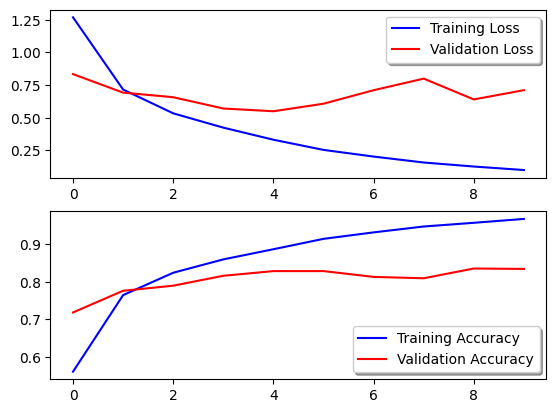

In [26]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [27]:
test_loss, test_acc = model.evaluate(valid_X, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7673 - loss: 1.4474


In [28]:
EPOCHS = 3
history = model.fit(train_X, y_train, epochs=EPOCHS, validation_data = (valid_X, y_test), batch_size=128)

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 27s 48ms/step - accuracy: 0.9575 - loss: 0.1414 - val_accuracy: 0.8405 - val_loss: 0.7602
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9920 - loss: 0.0247 - val_accuracy: 0.8430 - val_loss: 0.8916
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9962 - loss: 0.0132 - val_accuracy: 0.8415 - val_loss: 0.9855
